# 1 概率分布
## 离散的概率分布
## 1.1 伯努利分布：0-1分布

In [1]:
#导入包
import numpy as np #数组包
from scipy import stats #统计计算包的统计模块
import matplotlib.pyplot as plt #绘图包
import matplotlib
from pylab import *
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline

In [2]:
#1、定义随机变量：抛一次硬币，0代表失败即反面朝上；1代表成功即正面朝上
#（随机变量通常用大写字母表示）
X=np.arange(0,2,1)
X

array([0, 1])

In [3]:
#2、求对应分布的概率：
p=0.5 #硬币朝上的概率
pList=stats.bernoulli.pmf(X,p)
pList

array([0.5, 0.5])

Text(0.5, 1.0, '伯努利分布：p=0.50')

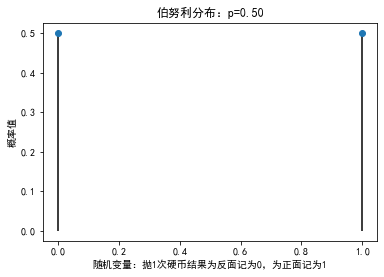

In [4]:
#3、绘图
plt.plot(X,pList,linestyle='None',marker='o') 
plt.vlines(X,0,pList) 
plt.xlabel('随机变量：抛1次硬币结果为反面记为0，为正面记为1')
plt.ylabel('概率值')
plt.title('伯努利分布：p=%0.2f'%p)

## 1.2 二项分布 

In [5]:
#1、定义随机变量：抛5次硬币，正面朝上的次数
n=5 #做某件事的次数
p=0.5 #做成功某件事的概率
X=np.arange(0,n+1,1)
X

array([0, 1, 2, 3, 4, 5])

In [6]:
#2、求对应分布的概率
pList=stats.binom.pmf(X,n,p) #参数含义为：pmf(k次成功,共n次实验,单次实验成功概率为p)
pList

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

Text(0.5, 1.0, '二项分布：n=5,p=0.50')

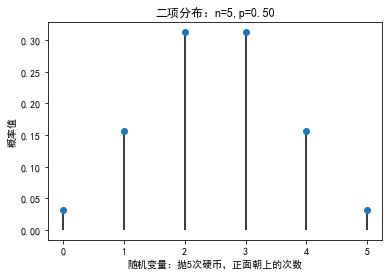

In [7]:
#3、绘图
plt.plot(X,pList,linestyle='None',marker='o')
plt.vlines(X,0,pList)
plt.xlabel('随机变量：抛5次硬币，正面朝上的次数')
plt.ylabel('概率值')
plt.title('二项分布：n=%i,p=%0.2f'%(n,p))

## 1.3 几何分布

In [8]:
#1、定义随机变量：首次成功所需次数k
k=5 #做某件事的次数
p=0.6 #做成功某件事的概率
X=np.arange(1,k+1,1)
X

array([1, 2, 3, 4, 5])

In [9]:
#2、求对应分布的概率
pList=stats.geom.pmf(X,p) #参数含义为：pmf(第X次成功,单次实验成功概率为p)
pList

array([0.6    , 0.24   , 0.096  , 0.0384 , 0.01536])

Text(0.5, 1.0, '几何分布：p=0.60')

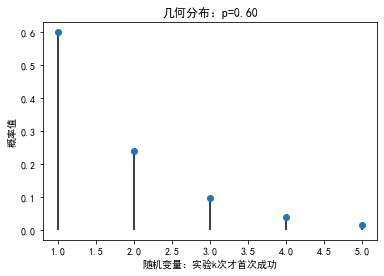

In [10]:
#3、绘图
plt.plot(X,pList,linestyle='None',marker='o')
plt.vlines(X,0,pList)
plt.xlabel('随机变量：实验k次才首次成功')
plt.ylabel('概率值')
plt.title('几何分布：p=%0.2f'%p)

## 1.4 泊松分布

In [11]:
#1、定义随机变量：已知某路口平均每天发生事故两次，则该路口一天内发生k起事故的概率是多少？
mu=2 #平均值：每天平均发生2起事故
k=4 #该路口发生4起事故的概率
X=np.arange(0,k+1,1)
X

array([0, 1, 2, 3, 4])

In [12]:
#2、求对应分布的概率
pList=stats.poisson.pmf(X,mu) #参数含义为：pmf(发生X次事件,平均发生mu次)
pList

array([0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.09022352])

Text(0.5, 1.0, '泊松分布：平均值mu=2')

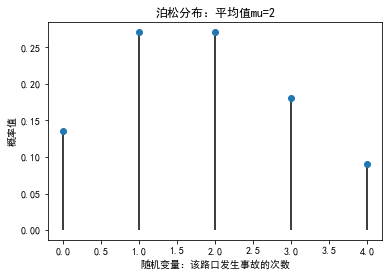

In [13]:
#3、绘图
plt.plot(X,pList,linestyle='None',marker='o')
plt.vlines(X,0,pList)
plt.xlabel('随机变量：该路口发生事故的次数')
plt.ylabel('概率值')
plt.title('泊松分布：平均值mu=%i'%mu)

## 连续的概率分布
## 1.5 正态分布

Text(0.5, 1.0, '正态分布：$\\mu$=0.0，$\\sigma^2$=1.0')

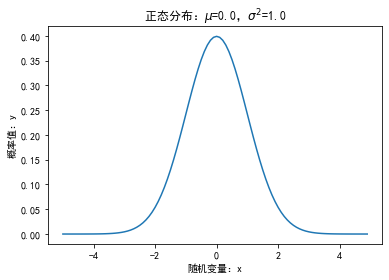

In [14]:
#1、定义随机变量
mu=0 #平均值
sigma=1 #标准差
X=np.arange(-5,5,0.1)
#2、求对应分布的概率
pList=stats.norm.pdf(X,mu,sigma) #参数含义为：pdf(发生X次事件,均值为mu,方差为sigma)
#3、绘图
plt.plot(X,pList,linestyle='-')
plt.xlabel('随机变量：x')
plt.ylabel('概率值：y')
plt.title('正态分布：$\mu$=%0.1f，$\sigma^2$=%0.1f'%(mu,sigma))

## 1.6 t分布 

比较t-分布与标准正态分布


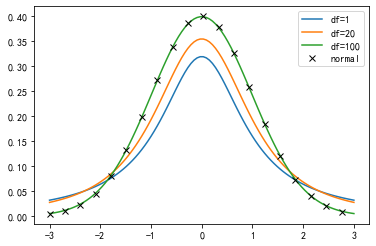

In [15]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
print('比较t-分布与标准正态分布')
x = np.linspace( -3, 3, 100)
plt.plot(x, t.pdf(x,1), label='df=1')
plt.plot(x, t.pdf(x,2), label='df=20')
plt.plot(x, t.pdf(x,100), label = 'df=100')
plt.plot( x[::5], norm.pdf(x[::5]),'kx', label='normal')
plt.legend()
plt.show()

# 2 正态性检验
## 2.1  Shapiro-Wilk test
## 原假设：样本数据与正态分布没有显著区别。
## 备择假设：样本数据与正态分布存在显著区别。
## 当p_value小于显著性水平α时，拒绝原假设。（α常见为0.05）

In [16]:
from scipy.stats import shapiro
data = [21,12,12,23,19,13,20,17,14,19]
stat,p = shapiro(data)
print("stat为：%f" %stat,"p值为：%f" %p)

stat为：0.913007 p值为：0.302289


# 2.2 scipy.stats.normaltest

In [19]:
from scipy.stats import normaltest
data = [21,12,12,23,19,13,20,17,14,19]
k2,p = normaltest(data)
print("p值为：%f" %p)

p值为：0.331461


# 3 相关性检验
## 3.1 皮尔逊相关系数
## 检验两个样本是否具有单调关系
## 假设：
* 每个样本中的观察是独立同分布的
* 每个样本的观察都是正态分布的
* 每个样本的观察具有相同的方差

In [20]:
from scipy.stats import pearsonr
data1 = [21,12,12,23,19,13,20,17,14,19]
data2 = [12,11,8,9,10,15,16,17,10,16]
corr,p = pearsonr(data1,data2)
print("corr为：%f" %corr,"p值为：%f" %p)

corr为：0.142814 p值为：0.693889


##  通常情况下通过以下取值范围判断变量的相关强度：
## 相关系数corr（均取绝对值后）
- 0.8-1.0 极强相关
- 0.6-0.8 强相关
- 0.4-0.6 中等程度相关
- 0.2-0.4 弱相关
- 0.0-0.2 极弱相关或无相关

## 原假设：两变量之间不存在线性关联
## 备择假设：两变量之间存在线性关联
## 当p_value大于显著性水平α时，接受原假设。

## 3.2 卡方检验
## 检验两个分类变量是相关的还是独立的
## 假设：
* 用于计算列联表的观察是独立的

In [21]:
from scipy import stats
obs = [102, 102, 96, 105, 95, 100]
exp = [100, 100, 100, 100, 100, 100]
stats.chisquare(obs, f_exp = exp)

Power_divergenceResult(statistic=0.74, pvalue=0.980701472519648)

## 从结果来看，p 值为0.98，可以认为观测到的值和预期值是相近即“合适”的。